<font color='red' size=5>**Data Preprocessing**</font>



1. **Missing Values** :- checking if there exists missing values. If it does, handling them appropriately by dropping the rows or may fill with suitable values,

2. **Data types** :- Checking if the data types of the columns are proper or not,

3. **Checking for outliers**,

4. **Feature engineering**,

5. **Feature scaling** to ensure the ranges are similar.

**Importing the required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading the california housing dataset

In [ ]:
df = pd.read_csv("/content/cal_housing.csv")
columns = [column for column in df.columns]
df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


**Checking if any null or missing value exists**

In [ ]:
df.isna().sum()

longitude           0
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       0
population          0
households          0
medianIncome        0
medianHouseValue    0
dtype: int64

**checking the information like total no of rows, shapes and datatypes of the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20640 non-null  float64
 1   latitude          20640 non-null  float64
 2   housingMedianAge  20640 non-null  float64
 3   totalRooms        20640 non-null  float64
 4   totalBedrooms     20640 non-null  float64
 5   population        20640 non-null  float64
 6   households        20640 non-null  float64
 7   medianIncome      20640 non-null  float64
 8   medianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Now, we will visualize ourdata set using histograms, to see if our dataset follows approximately a normal distribution

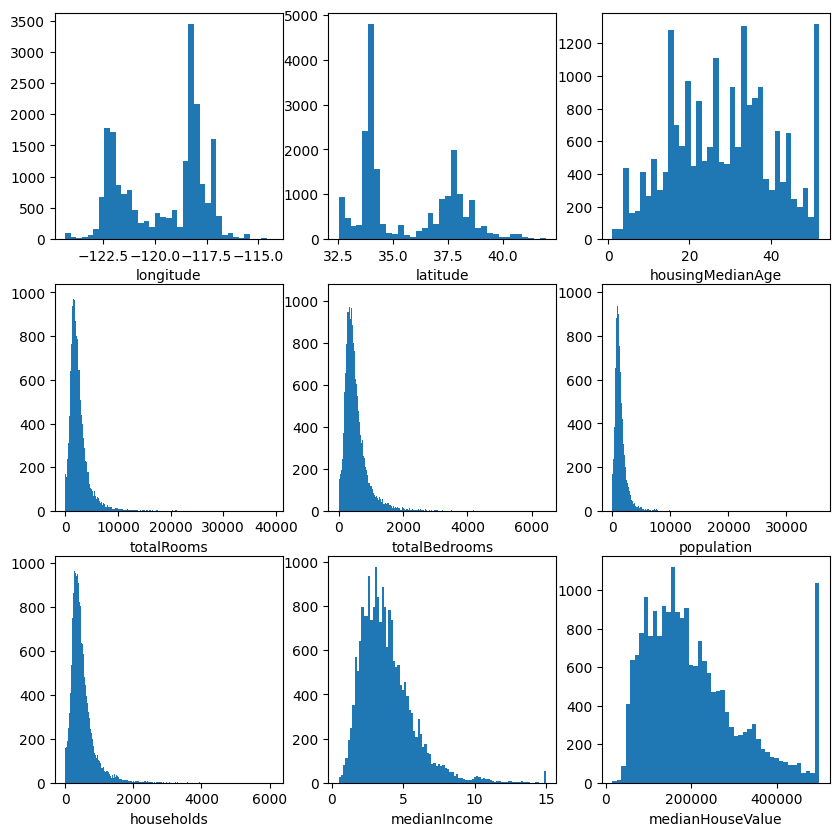

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(10,10))
axes = axes.flatten()
for i,ax in enumerate(axes):
  ax.hist(df[columns[i]],bins="auto")
  ax.set_xlabel(f"{columns[i]}")

**checking for outliers**

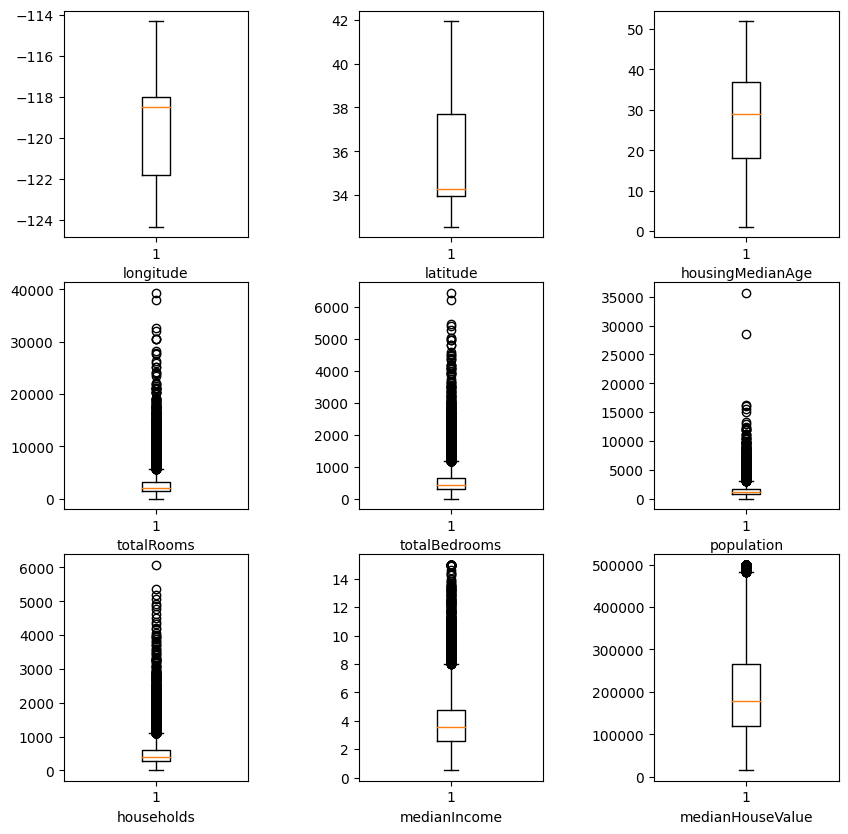

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(10,10))
axes = axes.flatten()
for i,ax in enumerate(axes):
  ax.boxplot(df[columns[i]])
  ax.set_xlabel(f'{columns[i]}')


plt.subplots_adjust(hspace=0.2, wspace=0.6)

Now, we will transform our data using **box-cox transformation** trying to make it into normal distribution,

In [ ]:
from scipy.stats import boxcox


box_cox_data = {}
lambda_values = {}

for column in columns:
  if column =="longitude":
    continue
  box_cox_data[column],lambda_values[column] = boxcox(df[column])

new_df = pd.DataFrame(box_cox_data)
new_df["longitude"] = longitude
new_df = new_df.iloc[:, -1:].join(new_df.iloc[:, :-1])
new_df.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,2.12001,0.191729,23.723216,15.706729,8.803132,12.308116,9.264721,2.337069,32.675418
1,2.13001,0.191729,13.286954,27.556487,17.015652,22.335341,18.799348,2.333598,31.509297
2,2.11001,0.191729,29.017459,18.123797,10.006475,14.082654,10.423372,2.171691,31.420577
3,2.10001,0.191729,29.017459,17.429179,10.712866,14.598635,11.199954,1.873879,31.267611
4,2.10001,0.191729,29.017459,18.647499,11.320973,14.654092,11.840977,1.432988,31.280519


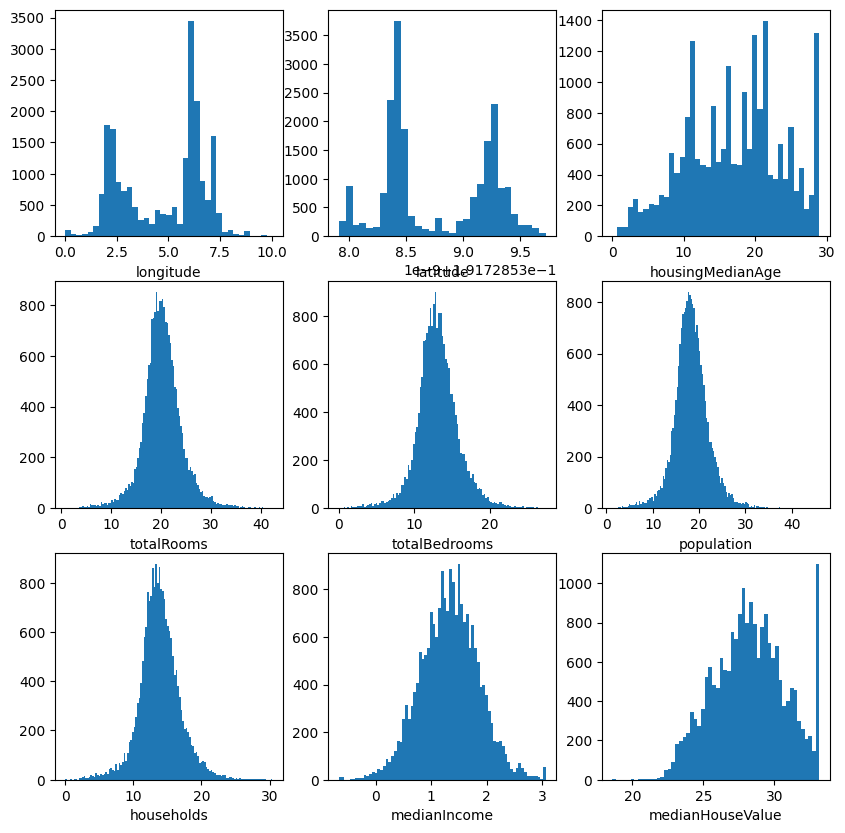

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(10,10))
axes = axes.flatten()
for i,ax in enumerate(axes):
  ax.hist(new_df[columns[i]],bins="auto");
  ax.set_xlabel(f"{columns[i]}")

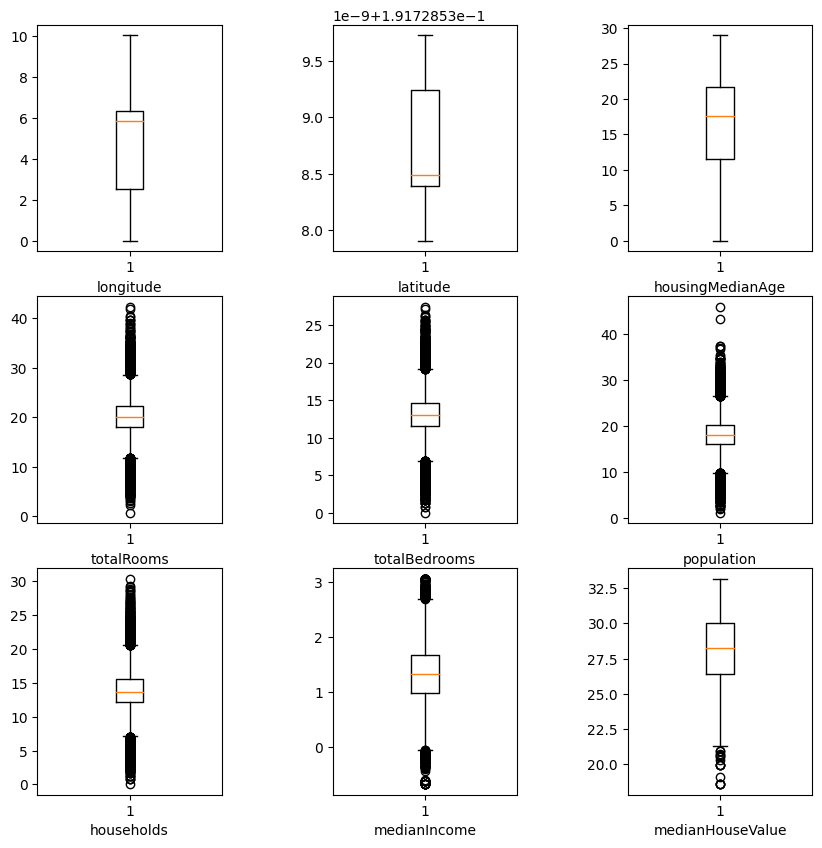

In [ ]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=(10,10))
axes = axes.flatten()
for i,ax in enumerate(axes):
  ax.boxplot(new_df[columns[i]])
  ax.set_xlabel(f'{columns[i]}')


plt.subplots_adjust(hspace=0.2, wspace=0.6)

**checking for outliers using z-score**

In [ ]:
from scipy.stats import zscore


z_scores = zscore(new_df["totalRooms"])
outliers = (z_scores > 3) | (z_scores < -3)
print(f"Total outliers for totalRooms : {outliers.sum()}")

outlier_indices = outliers[outliers==True].index.values


Total outliers for totalRooms : 318


In [ ]:
outliers_dict = {}
for column in columns:
  z_scores = zscore(new_df[column])
  outliers = (z_scores > 3) | (z_scores < -3)
  print(f"Total outliers for {column} : {outliers.sum()}")
  if not outliers.sum():
    continue
  outliers_dict[column] = list(outliers[outliers==True].index.values)
# print("\n",outliers_dict)
indices = np.array([value for sublist in outliers_dict.values() for value in sublist])
# print(f"\n{indices}")
unique_elements, counts = np.unique(indices,return_counts=True)
# print(f"\n{unique_elements}: {counts}")
print(f"\nTotal indices: {len(unique_elements)}")

Total outliers for longitude : 0
Total outliers for latitude : 0
Total outliers for housingMedianAge : 0
Total outliers for totalRooms : 318
Total outliers for totalBedrooms : 305
Total outliers for population : 312
Total outliers for households : 301
Total outliers for medianIncome : 122
Total outliers for medianHouseValue : 11

Total indices: 540


Removing the potential **outliers** detected using **Z-scores**

In [ ]:
df1 = new_df.drop(unique_elements)
print(new_df.shape)
print(df1["medianHouseValue"].mean(),df1["medianHouseValue"].std())
print(df1.shape)
df1.head()
df1.to_csv("cal_housing_tuned.csv",index=False)

(20640, 9)
28.264248211328773 2.540219800846998
(20100, 9)
